In [91]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [92]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [94]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, None)

In [95]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [96]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].fillna(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].mean())

C:\Users\sumit\AppData\Local\Temp\ipykernel_6092\1145840504.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].fillna(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].mean())


In [97]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [98]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Least possible values of :

Glucose --> 40

BloodPressure --> 60 -80

SkinThickness --> 40 -300

Insuline --> 2 - 25

BMI --> 18.5 - 24.9

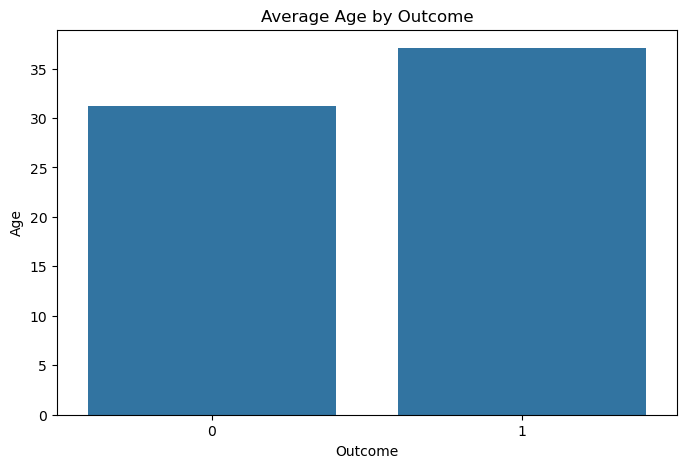

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between Age and Outcome using bar plot and use groupby to find average age for each outcome
age_outcome = data.groupby('Outcome')['Age'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Outcome', y='Age', data=age_outcome)
plt.title('Average Age by Outcome')
plt.show()


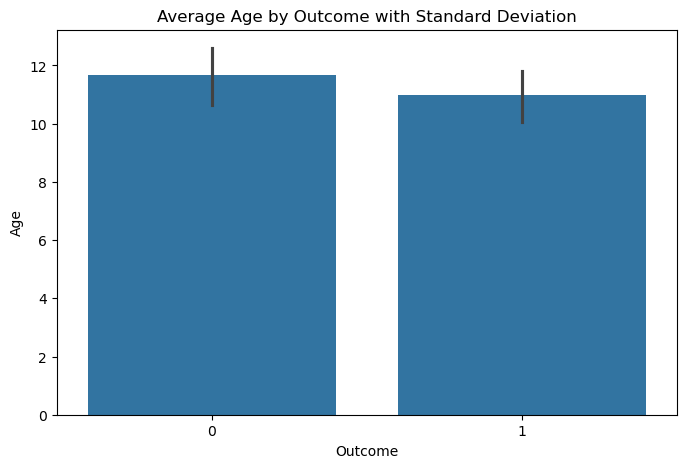

In [100]:
# above bar plot with estimation of standard deviation
plt.figure(figsize=(8, 5))
sns.barplot(x='Outcome', y='Age', data=data, estimator='std')
plt.title('Average Age by Outcome with Standard Deviation')
plt.show()

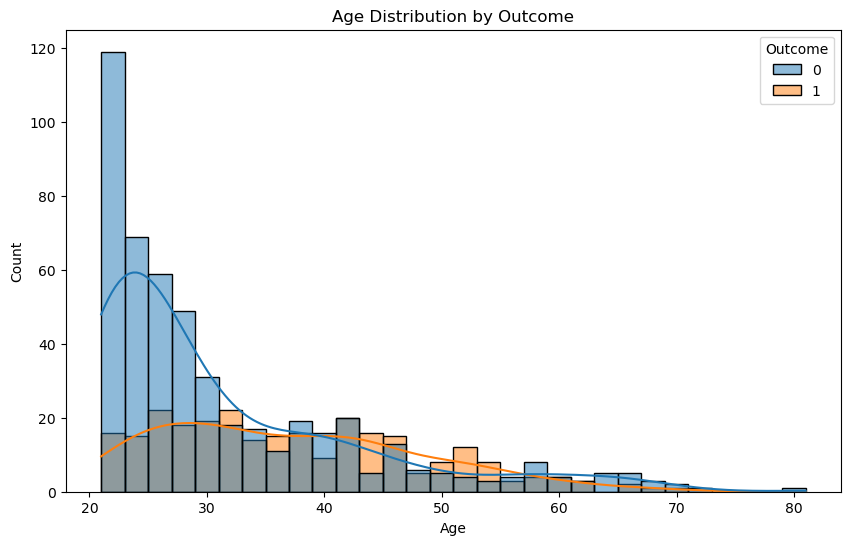

In [101]:
# Realationship between Age and Outcome using histogram

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Outcome', bins=30, kde=True)
plt.title('Age Distribution by Outcome')
plt.show()


In [102]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [103]:
# calculate standard deviation of Age for each Outcome
data['Age'].groupby(data['Outcome']).std()


Outcome
0    11.667655
1    10.968254
Name: Age, dtype: float64

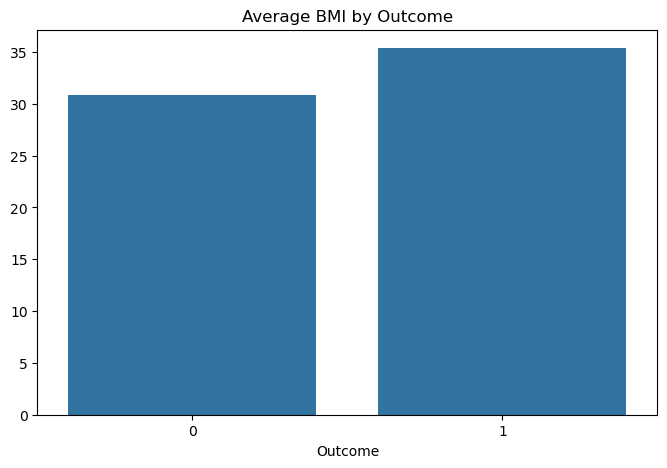

In [104]:
# Relationship between BMI and Outcome using bar plot with average BMI for each outcome

bmi_outcome = data['BMI'].groupby(data['Outcome']).mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=bmi_outcome.index, y=bmi_outcome.values)
plt.title('Average BMI by Outcome')
plt.show()


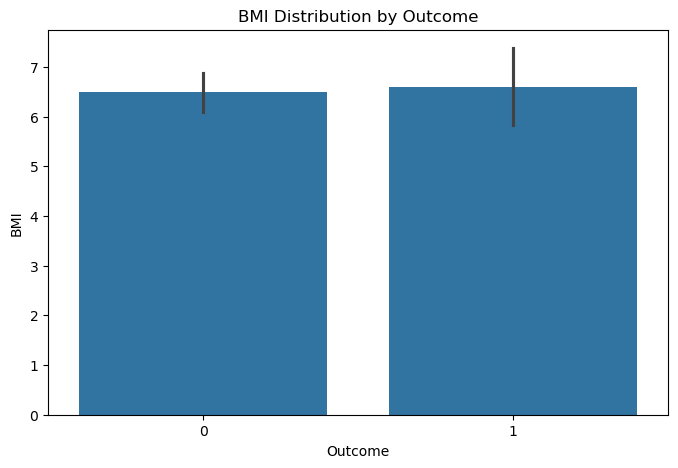

In [105]:
# Relationship between BMI and Outcome using bar plot with standard deviation

data['BMI'].groupby(data['Outcome']).std()
plt.figure(figsize=(8, 5))
sns.barplot(x='Outcome', y='BMI', data=data, estimator='std')
plt.title('BMI Distribution by Outcome')
plt.show()

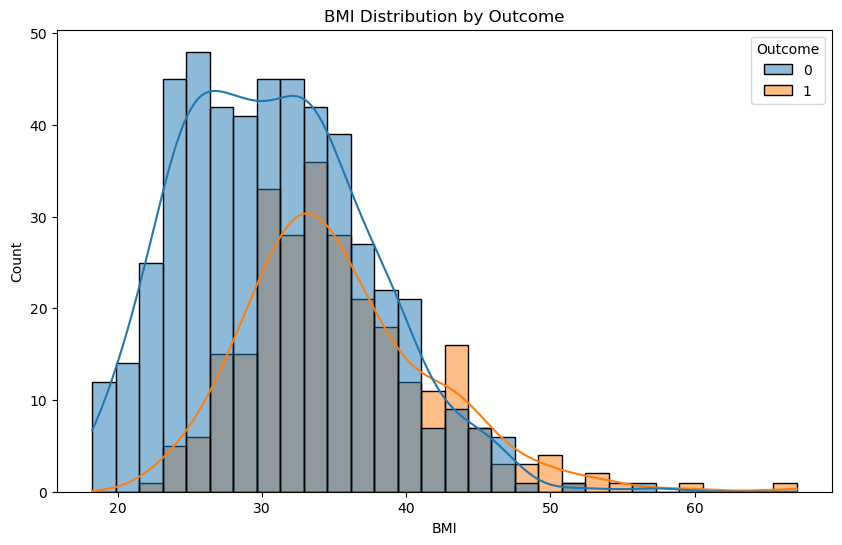

In [106]:
# Histogram of BMI by Outcome

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='BMI', hue='Outcome', bins=30, kde=True)
plt.title('BMI Distribution by Outcome')
plt.show()

In [107]:
data['BMI'].groupby(data['Outcome']).std()

Outcome
0    6.504779
1    6.595065
Name: BMI, dtype: float64

In [108]:
data['BMI'].groupby(data['Outcome']).mean()

Outcome
0    30.888434
1    35.384757
Name: BMI, dtype: float64

Outcome
0    70.935397
1    75.147324
Name: BloodPressure, dtype: float64


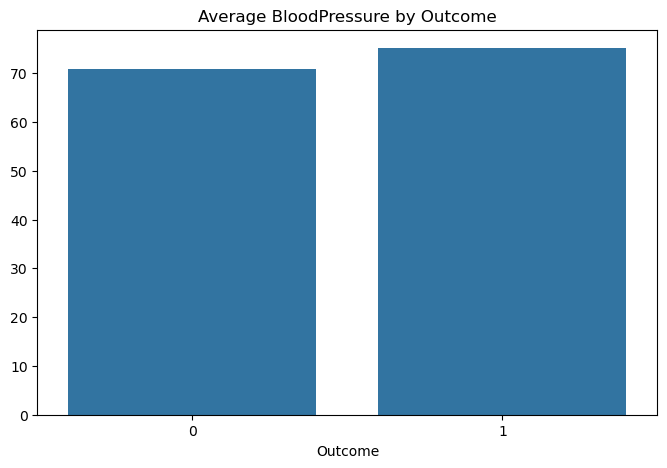

In [109]:
# Realationship between BloodPressure and Outcome using barplot with average BloodPressure for each outcome

bp_outcome = data['BloodPressure'].groupby(data['Outcome']).mean()
print(data['BloodPressure'].groupby(data['Outcome']).mean())
plt.figure(figsize=(8, 5))
sns.barplot(x=bp_outcome.index, y=bp_outcome.values)
plt.title('Average BloodPressure by Outcome')
plt.show()

Outcome
0    11.931033
1    11.945712
Name: BloodPressure, dtype: float64


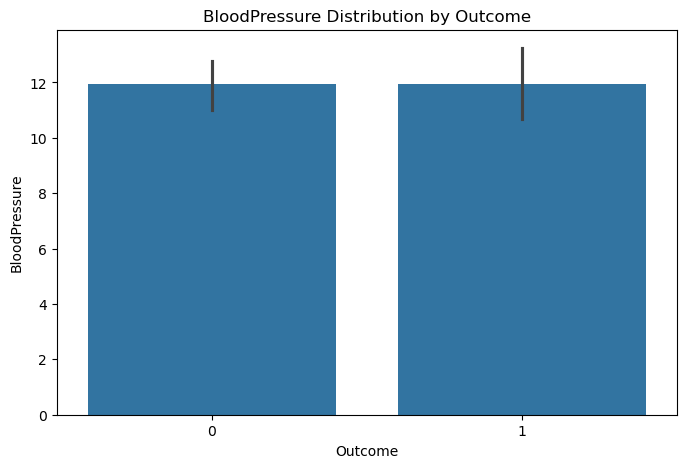

In [110]:
print(data['BloodPressure'].groupby(data['Outcome']).std())
plt.figure(figsize=(8, 5))
sns.barplot(x='Outcome', y='BloodPressure', data=data, estimator='std')
plt.title('BloodPressure Distribution by Outcome')
plt.show()


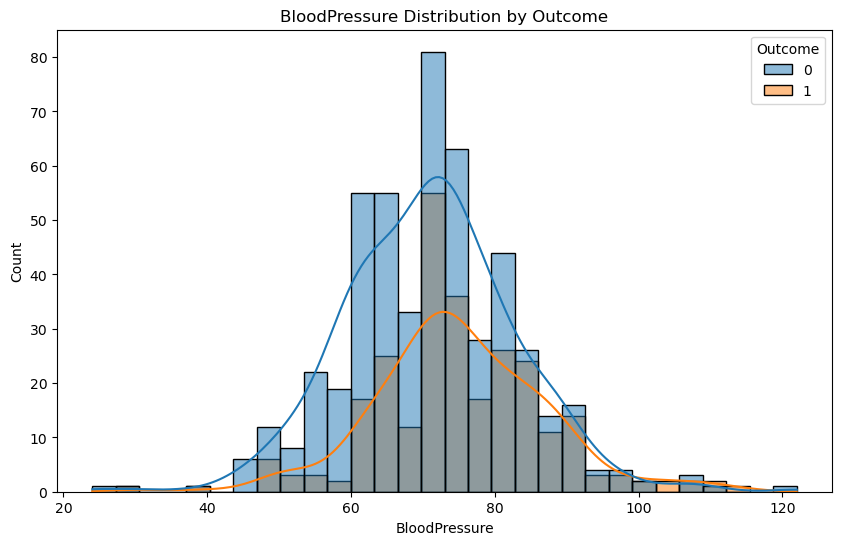

In [111]:
# Relationship between BloodPressure and Outcome using histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='BloodPressure', hue='Outcome', bins=30, kde=True)
plt.title('BloodPressure Distribution by Outcome')
plt.show()


In [112]:
# independent t test between BloodPressure of Outcome 0 and Outcome 1
from scipy import stats

bp_outcome0 = data[data['Outcome'] == 0]['BloodPressure']
bp_outcome1 = data[data['Outcome'] == 1]['BloodPressure']

t_stat, p_value = stats.ttest_ind(bp_outcome0, bp_outcome1)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -4.661098993631144, P-value: 3.709288185093571e-06


Outcome
0    142.210761
1    180.431548
Name: Insulin, dtype: float64


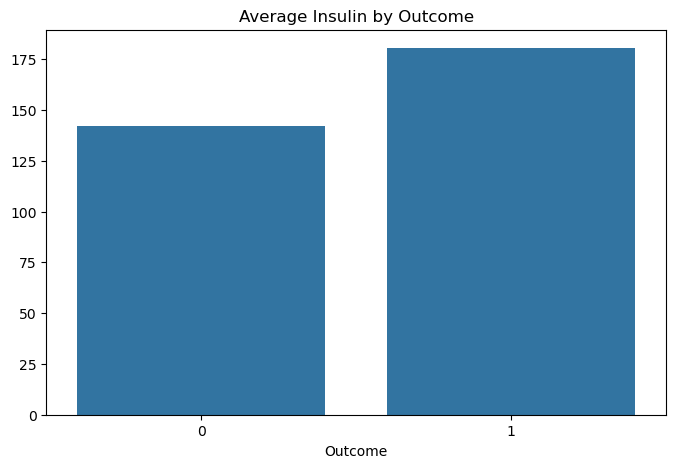

In [113]:
# relationship between Insulin and Outcome using bar plot with average Insulin for each outcome

insulin_outcome = data['Insulin'].groupby(data['Outcome']).mean()
print(insulin_outcome)
plt.figure(figsize=(8, 5))
sns.barplot(x=insulin_outcome.index, y=insulin_outcome.values)
plt.title('Average Insulin by Outcome')
plt.show()

Outcome
0    75.463785
1    95.747538
Name: Insulin, dtype: float64


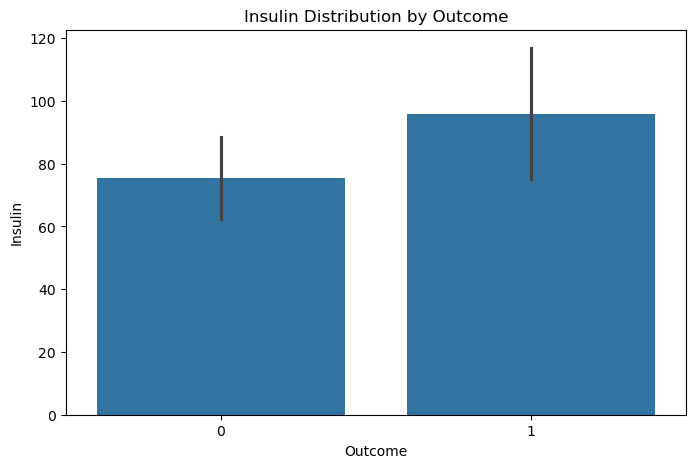

In [114]:
# Relationship between Insulin and Outcome using bar plot with standard deviation

print(data['Insulin'].groupby(data['Outcome']).std())
plt.figure(figsize=(8, 5))
sns.barplot(x='Outcome', y='Insulin', data=data, estimator='std')
plt.title('Insulin Distribution by Outcome')
plt.show()

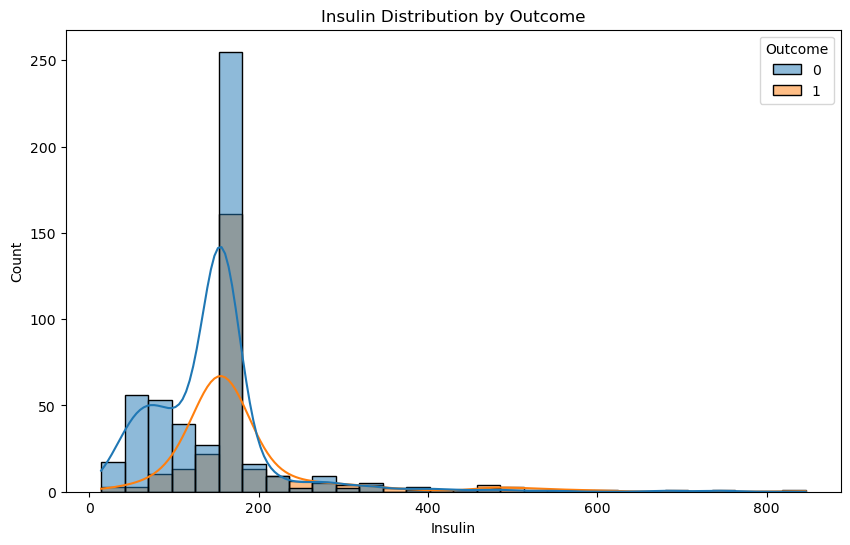

In [115]:
# Relationship between Insulin and Outcome using histogram

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Insulin', hue='Outcome', bins=30, kde=True)
plt.title('Insulin Distribution by Outcome')
plt.show()

Outcome
0    110.710121
1    142.165573
Name: Glucose, dtype: float64


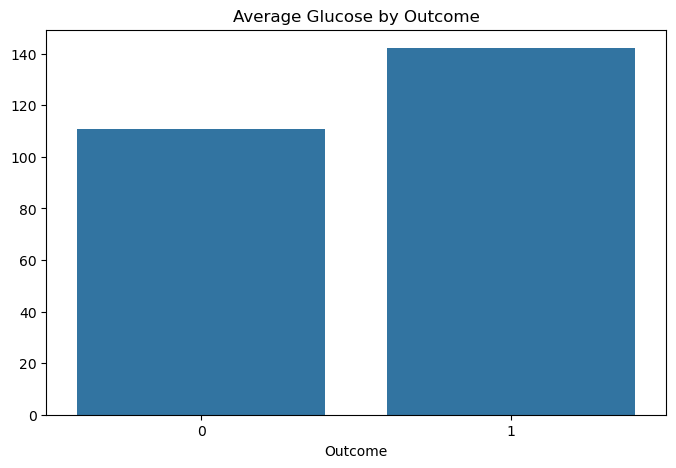

In [116]:
# relationship between glucose and outcome using bar plot with average glucose for each outcome

glucose_outcome = data['Glucose'].groupby(data['Outcome']).mean()
print(glucose_outcome)
plt.figure(figsize=(8, 5))
sns.barplot(x=glucose_outcome.index, y=glucose_outcome.values)
plt.title('Average Glucose by Outcome')
plt.show()


Outcome
0    24.71706
1    29.54175
Name: Glucose, dtype: float64


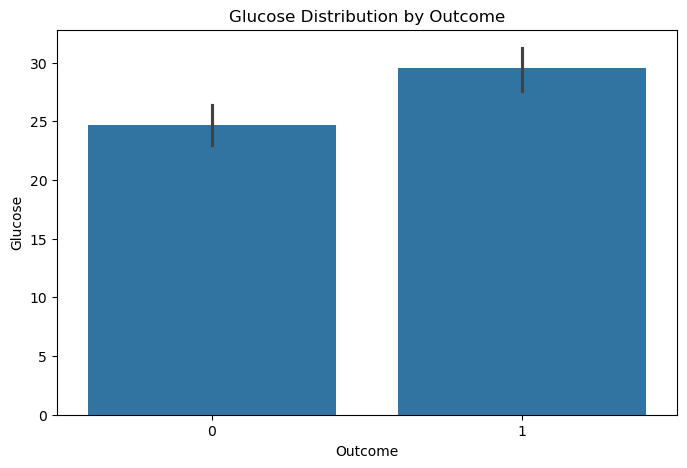

In [117]:
# relationship between glucose and outcome using bar plot with standard deviation
print(data['Glucose'].groupby(data['Outcome']).std())
plt.figure(figsize=(8, 5))
sns.barplot(x='Outcome', y='Glucose', data=data, estimator='std')
plt.title('Glucose Distribution by Outcome')
plt.show()


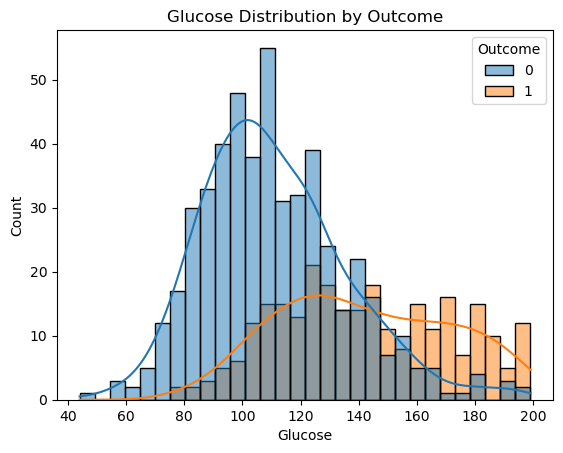

In [118]:
# relationship between glucose and outcome using histogram
sns.histplot(data=data, x='Glucose', hue='Outcome', bins=30, kde=True)
plt.title('Glucose Distribution by Outcome')
plt.show()


In [119]:
die_skin = data['SkinThickness'][data['Outcome'] == 1]
nondie_skin = data['SkinThickness'][data['Outcome'] == 0]

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(die_skin, nondie_skin)

alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in SkinThickness between Outcome groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in SkinThickness between Outcome groups.")


Reject the null hypothesis: Significant difference in SkinThickness between Outcome groups.


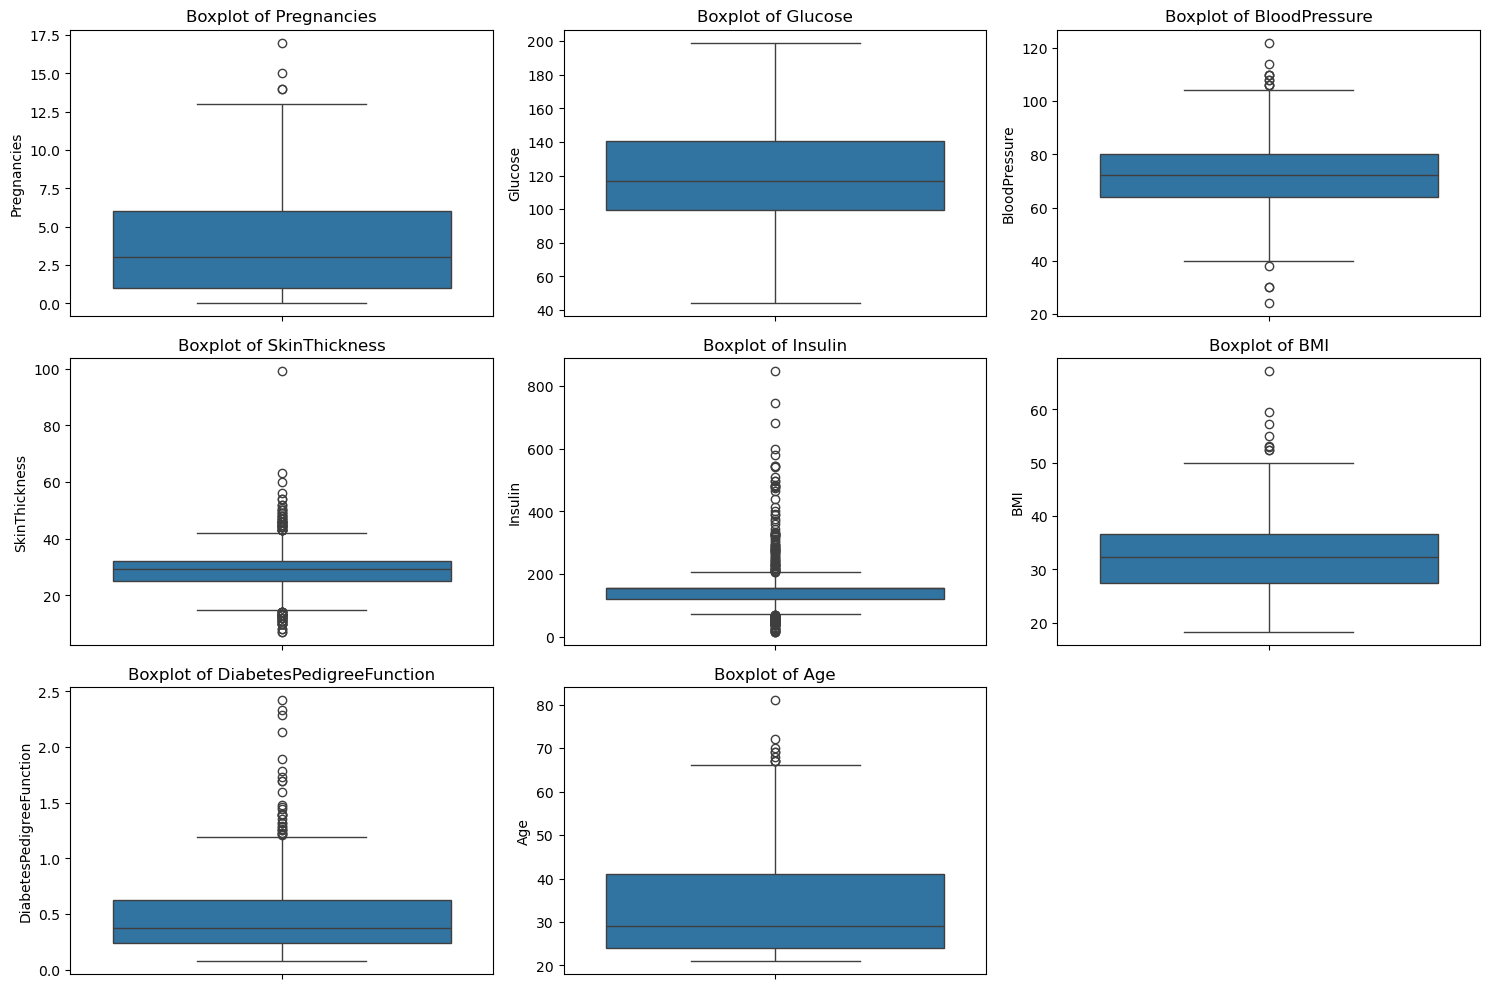

In [120]:
# Outliers in each column using boxplot

plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

C:\Users\sumit\AppData\Local\Temp\ipykernel_6092\2599458629.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.8450520833333335' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
C:\Users\sumit\AppData\Local\Temp\ipykernel_6092\2599458629.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.240885416666664' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value


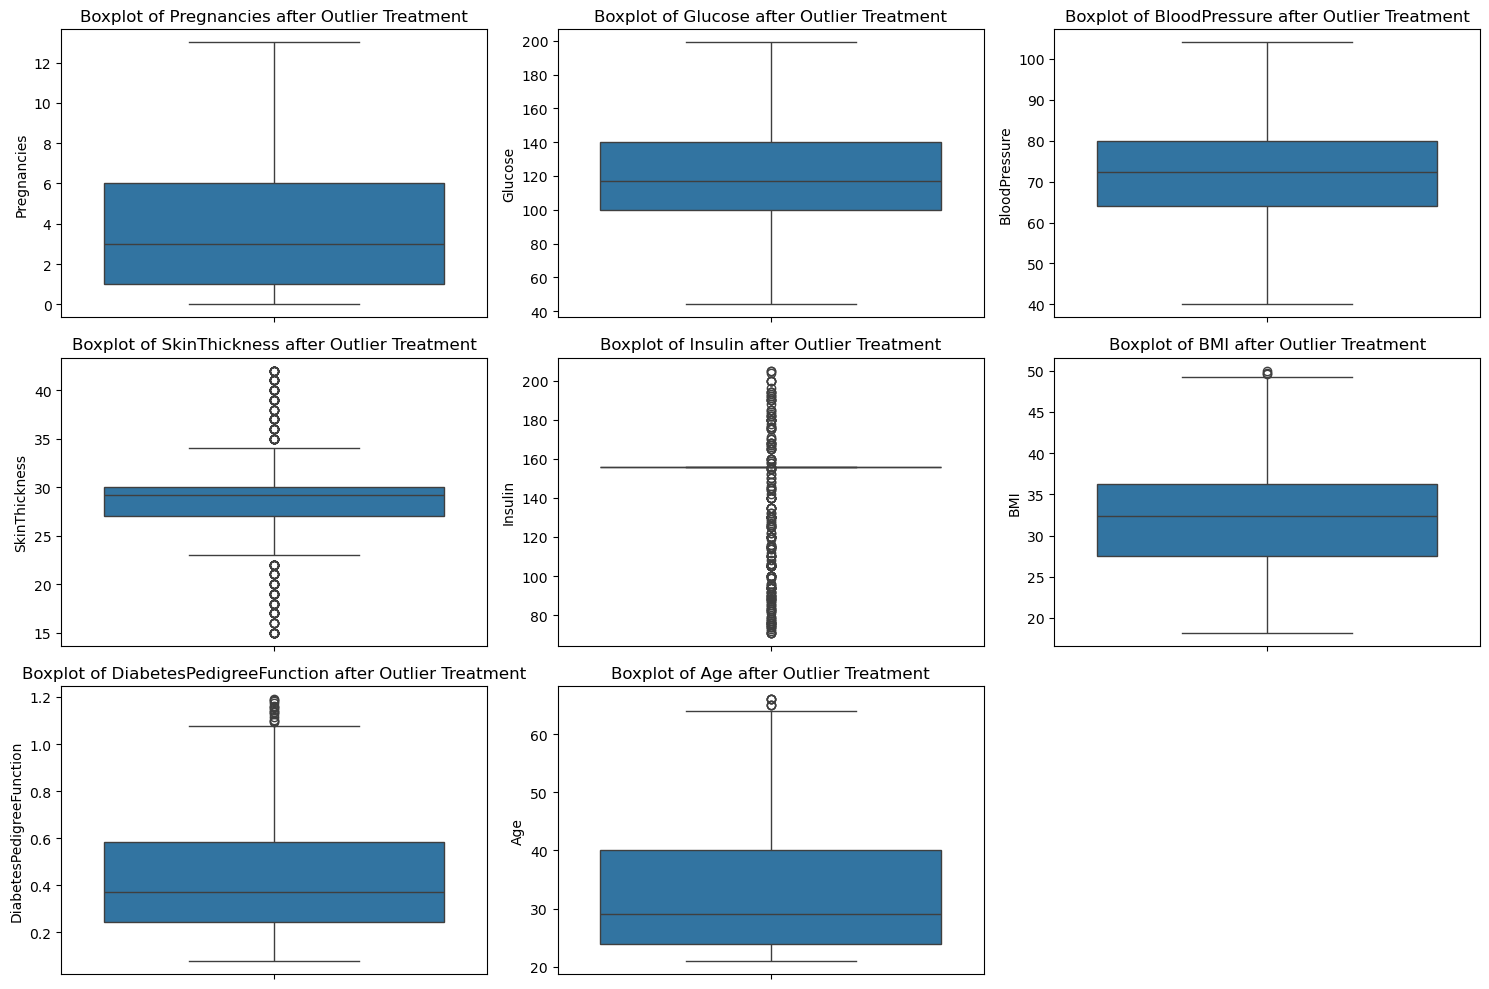

In [121]:
# replace outliers in each column with mean of that column

for column in data.columns[:-1]:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = data[column].mean()
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value

# Outliers in each column after replacing with mean using boxplot
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column} after Outlier Treatment')
plt.tight_layout()
plt.show()

In [122]:
# Apply min-max scaling to the dataset except Outcome column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled=data_scaled.drop(columns=['Outcome'])
data_scaled[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])

data_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.291304,0.501205,0.502093,0.511920,0.571439,0.440575,0.317538,0.262447
std,0.251550,0.196361,0.169912,0.213688,0.179386,0.201591,0.220170,0.245509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.359677,0.375000,0.444444,0.630957,0.292453,0.148922,0.066667
50%,0.230769,0.470968,0.506331,0.524201,0.630957,0.446541,0.264600,0.177778
75%,0.461538,0.620968,0.625000,0.555556,0.630957,0.569182,0.453055,0.422222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
from sklearn.model_selection import train_test_split
X = data_scaled
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [137]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [138]:
# calculate the training prediction

y_train_pred = model.predict(X_train)

In [139]:
# Accuracy score
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 0.78


In [135]:
# testing accuracy 
y_train_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test,y_train_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Testing Accuracy: 0.73


In [140]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[316,  34],
       [ 85, 102]])

In [ ]:
confusion_matrix(y_test,)

ValueError: Found input variables with inconsistent numbers of samples: [231, 537]